# CSCI 381/780 (Fall 2022) - Project 2

**Due Date: Monday, November 14 by 4 PM**

## Description
In this project you will construct machine learning models on two different real-world datasets using unsupervised learning and regression.

## Instructions
1. In this project you will write code to construct machine learning models and write responses to questions concerning the performance of said models. Please complete all sections below, adding new *Code* or *Markdown* cells as appropriate to answer the questions.
2. There are many Scikit-learn functions that leverage randomness to generate results. For these functions, a pseudorandom generator can be initialized using a seed value by passing the parameter `random_state=XXX`, where `XXX` is some number between 1 and 2^31-1. For each of these functions, **you will utilize your CUNY ID number** to initialize the function. Functions include:
- `ShuffleSplit`
- `KFold`
- `KMeans`
- `GridSearchCV`
- `Lasso`
- `MLPRegressor`
3. You will **work independently** on the project. Please make use of the *Python Data Science Reference Materials* posted on Blackboard, or **come to office hours should you need further assistance**.
4. You will submit a single Jupyter notebook containing all code and written responses via Blackboard by the due date listed above.

## Grading

### Running Code
Your Jupyter notebook must be able to run from start to finish **without error**. Please turn any cell that contains scratch work or other non-executable items to *Raw*. **Notebooks that cannot run to completion will receive a grade of 0**.


### Rubric

|**Part**|1.1|1.2|2.1|2.2|2.3|2.4|2.5|2.6|**Total**|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**%**|10|30|15|5|10|10|10|10|100|


# Part 1: Clustering

In this part of the project, you will be using data collected by the US Geological Survey and the US Forest Service. The data describes various cartographic and geologic features related to forest cover in US wilderness areas, with each sample representing a 30 x 30 meter cell.

The **goal** will be to *identify clusters* that represent forest cover types, and using these clusters *extract relationships* between forest covers and the provided cartographic/geologic features.

In [79]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [80]:
# load the dataset
cover_column_names=["Elevation","Aspect","Slope",
              "Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon",
              "Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]
wilderness_cols =["Wilderness_"+str(i) for i in range(4)]
soil_col =["Soil_"+str(i) for i in range(40)]
cover_columns_names = cover_column_names + wilderness_cols + soil_col

## 1.1 Load Data
Set the variable `COVER_FILE` to the **full path** to the forest cover dataset (**forest_cover_dataset.csv**) on your system. Load the file into a dataframe (you may initialize the column names using the header list `cover_column_names`), then:
1. Determine the number and types of features.
2. Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%.
3. **Center** the training/validation/test splits (fit on the training set, then transform the validation/test sets).

In [81]:
# cover_file = f'C:/Users/tanzi/CS Lang IDE/PycharmProjects/Project-2/UTF-8_forest_cover_dataset.csv'
#search later, how to auto complete full path. https://www.youtube.com/watch?v=3Spa10-mwsw

cover_file = f'C:/Users/tanzi/CS Lang IDE/PycharmProjects/Jonathan/Project2/Project-2/UTF-8_forest_cover_dataset.csv'
forest_data = pd.read_csv(cover_file, names=cover_columns_names)
forest_data


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_30,Soil_31,Soil_32,Soil_33,Soil_34,Soil_35,Soil_36,Soil_37,Soil_38,Soil_39
0,2825,265,17,319,108,2298,174,245,209,342,...,0,0,1,0,0,0,0,0,0,0
1,2719,198,34,134,76,2352,187,245,167,693,...,0,0,0,0,0,0,0,0,0,0
2,3146,152,14,212,41,940,237,239,130,2007,...,0,0,0,0,0,0,0,0,0,0
3,2882,18,18,95,-3,485,203,199,128,342,...,1,0,0,0,0,0,0,0,0,0
4,2912,349,17,283,57,2729,187,210,160,2201,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280246,2919,224,18,85,24,451,193,254,193,1436,...,0,0,0,0,0,0,0,0,0,0
280247,2151,114,29,42,29,499,254,197,49,731,...,0,0,0,0,0,0,0,0,0,0
280248,3008,221,14,418,99,5346,202,253,185,1300,...,0,0,0,0,0,0,0,0,0,0
280249,2923,58,12,134,12,2213,228,214,117,424,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Determine the number of features
num_features = len(cover_columns_names)
print('Number of features: ', num_features)

Number of features:  54


In [83]:
#change the variable name

#Determine nature of object types
crime_cat_columns=dict()
crime_cat_columns_idx=dict()
crime_num_columns_idx=dict()
for col in cover_columns_names:
    if forest_data[col].dtype == 'int64':
        crime_cat_columns[col]=forest_data[col].unique()
        crime_cat_columns_idx[col]=forest_data.columns.get_loc(col)
        print(col,":", crime_cat_columns[col])
    elif np.issubdtype(forest_data.at[0,col], np.number):
        crime_num_columns_idx[col]=forest_data.columns.get_loc(col)

Elevation : [2825 2719 3146 ... 3626 3541 3607]
Aspect : [265 198 152  18 349 202 102  90   9 117 315  40 110   3 359 106 108 150
  32 347 127  62 123 176  53 100 180 166 189 243 294  72 112  22  45 274
  60 344  28 299  65  34 169  73  43  82 262 232  83  37 329  49 269  66
 140 133  33  61 350  63  74 326 193 225 226 342 318 276 316 167 303  55
 131  69 251  19 220  52 135  11 270  26  14 357  59  42  51 158 204 138
 356  78  12 306 165 238 235 352 219 307 119 311 351  36  95  25 163 162
 272  17 340 113  41 348   0 324  35  68  13  20 334 343 304  85  96 146
  99 143 301  79  98 336 196  21 101 116 170 317 245  38  92 111 211 354
 121   8 249 157 277  31   4 181 322 105 288 332 185 187 241 199 172 289
 207 281 291 222 107  93 302 195  56 247 314 327   7 287 263 333 309 209
 148 331   1 266   5  91  15 268  16 145 184 254 194  71 337 183 346 149
  80 285  58  57  89 118 330  50 125 296 182  27 231 248  54  70  97 103
 156 147  76  23  67 338 256 174 323 358 177 267 300 215  30 206 20

In [84]:
# Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%.
forest_data_list = np.array(forest_data)
from sklearn.model_selection import ShuffleSplit
split_test = ShuffleSplit(n_splits=1,test_size=0.2, random_state=23508893)
for train_index, test_index in split_test.split(forest_data_list):
    forest_train_proj_full = forest_data_list[train_index,:]
    forest_test_proj = forest_data_list[test_index,:]


split_validation = ShuffleSplit(n_splits=1,test_size=0.25, random_state=23508893)
for train_index, validation_index in split_validation.split(forest_train_proj_full):
    forest_train_proj = forest_train_proj_full[train_index,:]
    forest_validation_proj = forest_train_proj_full[validation_index,:]


In [85]:
# #Maybe comment this out?
# print("Dataset\t\tPercent")
# print("Training\t" + str(np.sum(forest_train_proj) / len(forest_train_proj)))
# print("Validation\t" + str(np.sum(forest_validation_proj) / len(forest_validation_proj)))
# print("Test\t\t" + str(np.sum(forest_test_proj) / len(forest_test_proj)))

1. How would want us to solve 1.1.3 [center the training]. Should I use customs transformer? If so, during the next step, should I use data_centered_train or forest_train_proj?
2. forest_train_proj = dataset (X) | data_center_train = first center randomly
3.


In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std=False)
forest_train_proj_scaled=scaler.fit_transform(forest_train_proj)
forest_validation_proj_scaled=scaler.transform(forest_validation_proj)
forest_test_proj_scaled=scaler.transform(forest_test_proj)
forest_train_proj_full_scaled=scaler.transform(forest_train_proj_full)

forest_train_proj_full_scaled

array([[ 8.91375558e+01, -1.45949057e+02, -2.10169492e+00, ...,
        -1.66815343e-02, -1.46000595e-02, -9.05738924e-03],
       [ 2.30137556e+02,  1.99050943e+02,  1.18983051e+01, ...,
        -1.66815343e-02, -1.46000595e-02, -9.05738924e-03],
       [ 2.01137556e+02,  1.67050943e+02, -2.10169492e+00, ...,
        -1.66815343e-02, -1.46000595e-02, -9.05738924e-03],
       ...,
       [ 1.84137556e+02,  1.59050943e+02, -1.31016949e+01, ...,
        -1.66815343e-02, -1.46000595e-02, -9.05738924e-03],
       [ 3.34137556e+02, -6.79490574e+01, -8.10169492e+00, ...,
        -1.66815343e-02, -1.46000595e-02, -9.05738924e-03],
       [-7.12862444e+02, -9.49057389e-01,  1.98983051e+01, ...,
        -1.66815343e-02, -1.46000595e-02, -9.05738924e-03]])

## 1.2 $k$-Means Clustering

1. Cluster the *training* dataset using ```KMeans``` from Scikit-learn using the values for $k$ below. You can utilize the default implementation in Scikit-learn, which is $k$-means$++$. Construct models for each value of $k$ specified in the ``k_values`` array below.
2. Apply the trained models to the validation dataset.
3. Compute the **mean** inertia for each value of $k$ on the training and validation datasets. For the training data, you can extract the *total* (**unnormalized**) inertia from the trained models via their respective ```inertia_```. For the validation models, you can utilize the function ```total_inertia``` provided below.
4. Plot the mean inertias for all values of $k$ and for both the training and validation sets on a single plot. Based on the elbow method, which value of $k$ should be chosen so that the model will generalize to new data?
5. The *Silhouette Coefficient* is another cluster performance metric that combines intra-cluster distance with inter-cluster distances from clusters in close proximity to each other. Utilize Scikit-learn's ```silhouette_score``` function [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) to compute the silhouette coefficient for all values of $k$ on the *validation* set. Plot these values and determine via the elbow method which value of $k$ should be chosen. How does this value compare to the one chosen using mean inertia?
6. Using whichever value of $k$ you think is the best based on steps 4) and 5), create a plot for each feature that contains [boxplots](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html#sphx-glr-gallery-statistics-boxplot-demo-py) of that feature for each cluster. Based upon these plots, determine which features you think are meaningful in discriminating between the clusters, as well as any other trends you observe.

### Please Read!
You may benefit from parallelizing the creation of the $k$-means models by using the Python package ```joblib```. I've included a code template below that you can customize. For additional details, please refer to [joblib's documentation](https://joblib.readthedocs.io/en/latest/parallel.html).

In [87]:
# from joblib import Parallel, delayed, parallel_backend
#
# with parallel_backend("loky", inner_max_num_threads=2):
#     results = Parallel(n_jobs=4)(delayed(func)(x, y) for x, y in data)
#     # which data?
#     # || x = forest_train_proj and y = data_centered_train?
#     # || x = k-mean and y = k-mean ++?
#     # || x = forest_train_proj and y = k-means
#     # func = center_function? or [cluster_centers_ or labels_] from k-means?

In [88]:
def total_inertia(dataset,centers,labels,distance=None,mean=True):
    # dataset= forest_validation_proj | centers = kmeans.cluster_centers_ [valid_predict] | label = valid_predict |mean=false
    """
    Computes the total inertia (the intracluster variance) given a dataset and the cluster centers.
    
    Parameters
    ----------
    dataset : numpy.ndarray
        The dataset to evaluate.
    center : numpy.ndarray or list
        The list of cluster centers.
    distance : function
        A function that computes the pairwise distance between two samples.
        Default: Euclidean (l_2) distance
    mean : bool
        If True, returns the mean inertia.
        Default: True
        
    Returns
    -------
    total_inertia : float
       The mean inertia (if mean==True) or total inertia (if mean==False).
"""
    num_samples,_ = dataset.shape
    total_inertia=0
    if distance is None:
        distance=lambda x,y: np.linalg.norm(x-y)**2
    for i,sample in enumerate(dataset):
        center = centers[labels[i]]
        total_inertia += distance(sample,center)
    
    if mean:
        return total_inertia/num_samples
    else:
        return total_inertia

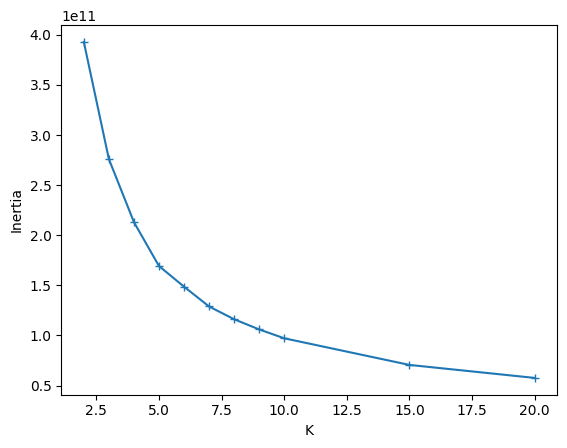

In [89]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

k_values = list(range(2,11))+[15,20]

inertias_list = []
k_model_list = []
cluster_list = []

for k in k_values:
    k_model = KMeans(n_clusters=k, random_state=23508893).fit(forest_train_proj_scaled)
    cluster = k_model.predict(forest_train_proj_scaled)
    k_model_list.append(k_model)
    inertias_list.append(k_model.inertia_)



In [90]:
# Apply the trained models to validation dataset

forest_validation_predict = []
forest_validation_center = []
for k_model in k_model_list:
    forest_validation_predict.append(k_model.predict(forest_validation_proj_scaled))
    forest_validation_center.append(k_model.cluster_centers_)

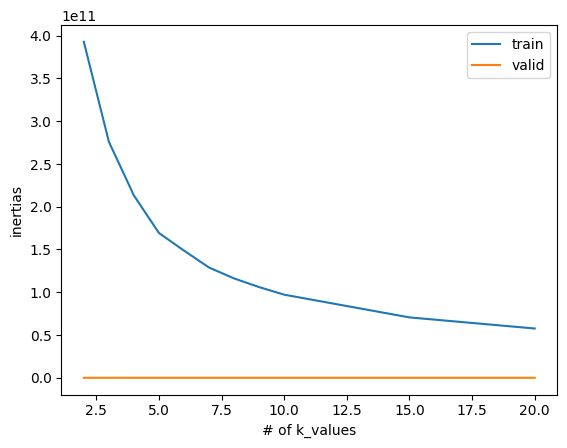

In [91]:
inertia_valid_list = []
for i in range(len(k_values)):
    inertia_valid_list.append(total_inertia(
        forest_validation_proj_scaled, forest_validation_center[i], forest_validation_predict[i]
    ))

plt.plot(k_values, inertias_list, label ='training')
plt.plot(k_values, inertia_valid_list, label ='validation')
plt.xlabel('# of k_values')
plt.ylabel('inertias')
plt.legend()
plt.show()

From elbow method graph, we could see that K = 3, should be chosen so that the model will generalize to new data

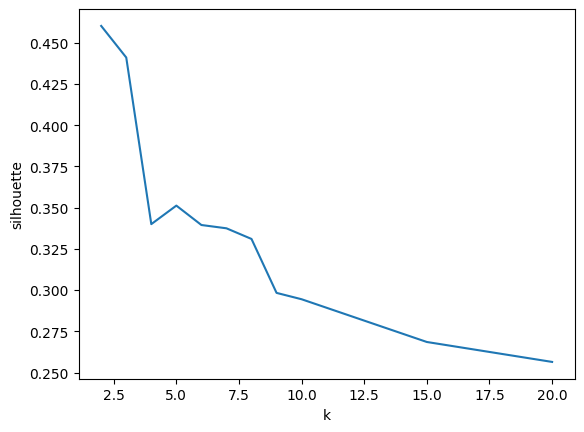

In [92]:
from sklearn.metrics import silhouette_score

silhouette_list = []
for i in range(len(k_values)):
    silhouette_list.append(silhouette_score(forest_validation_proj_scaled, forest_validation_predict[i]))

plt.plot(k_values, silhouette_list)
plt.xlabel('k')
plt.ylabel('silhouette')
plt.show()

In [93]:
best_k_value =k_values[np.argmax(silhouette_list)]
best_k_model = k_model_list[np.argmax(silhouette_list)]
best_forest_validation_predict = forest_validation_predict[np.argmax(silhouette_list)]
best_forest_validation_center = forest_validation_center[np.argmax(silhouette_list)]


for a in range(len(forest_validation_proj_scaled[0])):
    plt.figure()
    plt.boxplot([forest_validation_proj_scaled[best_forest_validation_predict == b][:, a] for b in range(best_k_value)])
    plt.title('feature ' +str(k))
    plt.show()

NameError: name 'a' is not defined

<Figure size 640x480 with 0 Axes>

# Part 2: Regression

In this part of the project, you will be utilizing a US database of crime and law enforcement statistics broken down by US Census communities. The **goal** will be to create *regression models* that predict *per capita violent crimes* (the response variable `ViolentCrimesPerPop`) for a given community based on these inputs. 

In [94]:
crime_column_names= ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize',
                 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
                 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
                 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
                 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov',
                 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
                 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr',
                 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
                 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
                 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
                 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
                 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous',
                 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded',
                 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal',
                 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc',
                 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
                 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
                 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic',
                 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp',
                 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked',
                 'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
                 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

## 2.1 Load Data
Set the variable `CRIME_FILE` to the **full path** to the forest cover dataset (**crime.csv**) on your system. Load the file into a dataframe (you may initialize the column names using the header list `crime_column_names`), then:
1. Determine the number and types of features.
2. Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%. 
3. Split the **non-test data** (*training* + *validation* data) into **5 folds** for cross-validation purposes.
4. Perform any necessary preprocessing on dataset. This may include:
  * determining if any features should be dropped;
  * handling missing data, through imputation and/or complete case analysis. If you **perform imputation on numerical values**, please use **median** imputation.

**Please note!** The Scikit-learn function `SimpleImputer` does not work as expected when the feature to impute is numerical but the missing values are not. One way to solve this is to first replace the missing values with NaN values (e.g., `np.nan`) using the Pandas Dataframe method `replace` [(documentation)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html).

In [95]:
import pandas as pd
CRIME_FILE="UTF-8_crime.csv"
crime_df = pd.read_csv(CRIME_FILE, header=None, names=crime_column_names)
crime_df.describe()

,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052,0.237979
std,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328,0.232985
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


1. Determine the number and types of features.

In [96]:
# determine the number of features
print(len(crime_df.columns))

# determine the data types of the features
print(crime_df.dtypes)

128
state                    int64
county                  object
community               object
communityname           object
fold                     int64
                        ...   
LemasPctPolicOnPatr     object
LemasGangUnitDeploy     object
LemasPctOfficDrugUn    float64
PolicBudgPerPop         object
ViolentCrimesPerPop    float64
Length: 128, dtype: object


4. Perform any necessary preprocessing on dataset. This may include:
  * determining if any features should be dropped;
  * handling missing data, through imputation and/or complete case analysis. If you **perform imputation on numerical values**, please use **median** imputation.

In [97]:
import numpy as np
crime_df.drop(columns=['communityname'],inplace=True)
crime_df.replace('?', np.nan, inplace= True)
crime_df.fillna(crime_df.median(),inplace=True)
crime_df.isnull().sum()


state                  0
county                 0
community              0
fold                   0
population             0
                      ..
LemasPctPolicOnPatr    0
LemasGangUnitDeploy    0
LemasPctOfficDrugUn    0
PolicBudgPerPop        0
ViolentCrimesPerPop    0
Length: 127, dtype: int64

2. Perform a **ShuffleSplit** of the data into training/validation/test sets, 60%/20%/20%.


In [99]:
from sklearn.model_selection import ShuffleSplit

# define the features and the outcome
feature_cols = [col for col in crime_df.columns if col != 'ViolentCrimesPerPop']
X = crime_df[feature_cols]
y = crime_df['ViolentCrimesPerPop']

# define the train, test, and validation sets
num_samples = len(crime_df)
num_train = int(0.6 * num_samples)
num_test = int(0.2 * num_samples)
num_validation = num_samples - num_train - num_test

train_validation_idx, test_idx = list(ShuffleSplit(n_splits=1, test_size=num_test, train_size=num_train+num_validation, random_state=42).split(X))[0]
train_idx, validation_idx = list(ShuffleSplit(n_splits=1, test_size=num_validation, train_size=num_train, random_state=42).split(X))[0]

# define the train, validation, and test sets
X_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]
X_validation = X.iloc[validation_idx]
y_validation = y.iloc[validation_idx]
X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]


3. Split the **non-test data** (*training* + *validation* data) into **5 folds** for cross-validation purposes.

In [100]:
from sklearn.model_selection import KFold

# define the k-fold cross-validation sets
X_train_cv, y_train_cv = [], []
cv = KFold(n_splits=5, shuffle=True, random_state=23508893)
for train_idx, val_idx in cv.split(X_train):
    X_train_cv.append(X_train.iloc[train_idx])
    y_train_cv.append(y_train.iloc[train_idx])


In [101]:
#peformance metric functions
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['mse','mae','r2']

def p2_metrics(y_true,y_pred,negation=False):
    if negation:
        sign = -1
    else:
        sign = 1
    return {
        'mse': sign*mean_squared_error(y_true,y_pred),
        'mae': sign*mean_absolute_error(y_true,y_pred),
        'r2': sign*r2_score(y_true,y_pred)}

#This wrapper can be used to return multiple performance metrics during cross-validation
def p2_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p2_metrics(y_true,y_pred,negation=True)

## 2.2 Linear Regression

1. Construct a linear model using Scikit-learn's `LinearRegression` method with default parameters.
2. Report the following performance metrics on the **training and validation sets**:
    *Mean Squared Error*, *Mean Absolute Error*, and the *Coefficient of Determination ($r^2$)*.

    You can use the function `p2_metrics` for this purpose. Is this model underfitting the data? Is so, why?
3. Report the weights (coefficients) of the linear model and their associated features in ascending order.

    Larger weights indicate that their corresponding features have more influence in the model. Moreover, negative weights correspond to variables having negative correlation with the response variable, and vice versa.

    Using this interpretation, describe the most significant features and their correlation.

1. Construct a linear model using Scikit-learn's `LinearRegression` method with default parameters.


In [102]:
from sklearn.linear_model import LinearRegression

# construct the linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

Report the following performance metrics on the **training and validation sets**:
    *Mean Squared Error*, *Mean Absolute Error*, and the *Coefficient of Determination ($r^2$)*.

    You can use the function `p2_metrics` for this purpose. Is this model underfitting the data? Is so, why?

In [103]:
# calculate the performance metrics on the training set
y_train_pred = linreg.predict(X_train)
print(p2_metrics(y_train, y_train_pred))

# calculate the performance metrics on the validation set
y_validation_pred = linreg.predict(X_validation)
print(p2_metrics(y_validation, y_validation_pred))

# # print the slope and intercept of the linear regression model
# print(linreg.coef_)
# print(linreg.intercept_)


{'mse': 0.015186877217989003, 'mae': 0.08755902438901525, 'r2': 0.7303707208111356}
{'mse': 0.019396349538435585, 'mae': 0.09888952758905466, 'r2': 0.5970174554342673}


Yes, this model is underfitting the data. The high MSE and MAE values indicate that the model is not able to accurately predict the labels. The low $r^2$ value also indicates that the model is not able to explain the variance in the data.

3. Report the weights (coefficients) of the linear model and their associated features in ascending order.

    Larger weights indicate that their corresponding features have more influence in the model. Moreover, negative weights correspond to variables having negative correlation with the response variable, and vice versa.

    Using this interpretation, describe the most significant features and their correlation.

In [104]:
feature_cols=list(crime_df.drop(columns=['ViolentCrimesPerPop']).columns)
# create a list of tuples containing the feature names and their weights
feature_weights =sorted(list(zip(feature_cols, linreg.coef_)), key=lambda t: t[1])

# print the feature names and their weights
for feature, weight in feature_weights:
    print(feature, weight)


LemasSwornFT -1.2097227688733168
PctPersOwnOccup -0.4702835563385203
LemasSwFTFieldOps -0.44580945029985436
whitePerCap -0.411189335922853
PctPolicMinor -0.40511795415949503
TotalPctDiv -0.3914824932987474
PctLargHouseOccup -0.35910392365316357
numbUrban -0.3254189413273373
RentLowQ -0.3251414863173955
OwnOccMedVal -0.32135843881341986
PctRecImmig10 -0.3122656827224236
PersPerOwnOccHous -0.30072894255786176
medIncome -0.2943916007318986
PctRecImmig5 -0.2848678646922741
OfficAssgnDrugUnits -0.2804359894707368
PolicBudgPerPop -0.2796148443965818
NumIlleg -0.2713898389723905
PctKids2Par -0.24192771122047002
LemasTotalReq -0.234279790274169
LemasSwFTFieldPerPop -0.23099940266998856
agePct12t29 -0.2299379620812462
PersPerRentOccHous -0.18515608058614608
PctFam2Par -0.17383306971627027
PctWorkMom -0.1700187694265106
PctNotSpeakEnglWell -0.16066326847164047
PctImmigRec8 -0.1521309098598051
NumImmig -0.14136685375436253
RentHighQ -0.12753847223812992
PctLess9thGrade -0.12339059083452894
PctSpe

The most significant features are 'medFamInc ', 'PctRecImmig8 ', 'PolicOperBudg ', 'PersPerOccupHous ' These features have the largest weights in the linear regression model.

## 2.3 Linear Regression and PCA

1. Perform principal component analysis on the **training data**. You may use Scikit-learn's `PCA` function for this, which **automatically centers** the data prior to PCA. Using PCA, *choose the number of components* for which the total explained variance is $\ge 99\%$, and report this.
2. After determining the correct number of components, apply the PCA transformation to the **validation** and **test** sets.
3. Create another model via `LinearRegression` but using the data transformed by PCA
Construct a linear model using Scikit-learn's `LinearRegression` method with default parameters.
4. Report the same performance metrics as in 2.2 on the **validation set**. How does the model's performance compare to that of the model in 2.2?

In [105]:
from sklearn.decomposition import PCA

# construct the PCA model
pca = PCA(n_components=0.99, random_state=23508893)

# fit the PCA model on the train set
pca.fit(X_train)
# transform the train, validation, and test sets
X_train_pca = pca.transform(X_train)
X_validation_pca = pca.transform(X_validation)
X_test_pca = pca.transform(X_test)

# construct the linear regression model
linreg = LinearRegression(normalize=True)

# fit the linear regression model on the train set
linreg.fit(X_train_pca, y_train)

# calculate the performance metrics on the train set
y_train_pred = linreg.predict(X_train_pca)
print(p2_metrics(y_train, y_train_pred))

# calculate the performance metrics on the validation set
y_validation_pred = linreg.predict(X_validation_pca)
print(p2_metrics(y_validation, y_validation_pred))

# calculate the performance metrics on the test set
y_test_pred = linreg.predict(X_test_pca)
print(p2_metrics(y_test, y_test_pred))


{'mse': 0.05625876358211447, 'mae': 0.18250653883209672, 'r2': 0.0011764989622476962}
{'mse': 0.04919053962388755, 'mae': 0.17943925606123373, 'r2': -0.021992761417029216}
{'mse': 0.04900650677009414, 'mae': 0.17889898092286446, 'r2': -0.02221656821714224}


C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Before PCA, the linear regression model had an $r^2$ value of 0.730 on the training set and 0.597 on the validation set. After PCA, the $r^2$ values decreased to 0.001 on the training set and -0.022 on the validation set. This indicates that the PCA model is not able to explain the variance in the data as well as the linear regression model.

## 2.4 LASSO

Utilizing *cross-validation* you will Construct an $\ell_1$-regularized linear model using Scikit-learn's `LASSO`:
1. Using `GridSearchCV`, determine the best choice of the hyperparameter $\alpha$ out of values in the list `alphas` below.
2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.
3. Report the weights (coefficients) of the LASSO model and their associated features in ascending order. Note that LASSO attempts to set as many weights to zero in order to create a more parsimonious model while still maintaining regression performance. How many weights are non-zero?

### Please Read!
There are a few parameters for the `GridSearchCV` and `RandomizedSearchCV` functions that should be set:
- `scoring` - This controls the strategy to evaluate the performance of the cross-validated model on the test set, set it to `p2_metrics_scorer`.
- `refit` - This will refit an estimator using the best found parameters on the whole dataset, set it to `"mse"`
- `cv` - This will enable you to reuse your CV splits created in Part 2.1
    `n_jobs` - Number of jobs to run in parallel, if you have more than one core on your device (you should), set this to as many as you'd like to use, or to `-1` if you want to use all available cores.
- `return_train_score` - Setting this to `False` will reduce computational time.

In [106]:
alphas = 10**np.linspace(1,-3,50)*0.5

In [107]:
#Summarizes model performance results produced during hyperparameter tuning
def collate_ht_results(ht_results,metric_keys=metric_keys,display=True):
    ht_stats=dict()
    for metric in metric_keys:
        ht_stats[metric+"_mean"] = ht_results.cv_results_["mean_test_"+metric][ht_results.best_index_]
        ht_stats[metric+"_std"] = metric_std = ht_results.cv_results_["std_test_"+metric][ht_results.best_index_]
        if display:
            print("test_"+metric,ht_stats[metric+"_mean"],"("+str(ht_stats[metric+"_std"])+")")
    return ht_stats

In [108]:
# import required libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import time

# define the parameter grid
param_grid = {
    'alpha': alphas
}

# instantiate a Lasso regression model
lasso_model = Lasso()

# create a cross-validation object
cv_object = KFold(n_splits=cv.n_splits, shuffle=True)

# set up the grid search object
grid_search = GridSearchCV(lasso_model, param_grid=param_grid, scoring=p2_metrics_scorer,
                           refit="mse", cv=cv_object, n_jobs=-1, return_train_score=False)

start = time.time()

# fit the grid search
grid_search.fit(X_train, y_train)
end = time.time()

# calculate the time required for cross-validation
cv_time = end - start

# print the time required for cross-validation
print("Time required for cross-validation: ", cv_time, "seconds")

# print the mean and standard deviation for each performance metric
collate_ht_results(grid_search)

Time required for cross-validation:  4.809979677200317 seconds
test_mse -0.01889385077984298 (0.0026540763795977534)
test_mae -0.09583579444443517 (0.007035651629944119)
test_r2 -0.6649511462167924 (0.03182233092983656)


{'mse_mean': -0.01889385077984298,
 'mse_std': 0.0026540763795977534,
 'mae_mean': -0.09583579444443517,
 'mae_std': 0.007035651629944119,
 'r2_mean': -0.6649511462167924,
 'r2_std': 0.03182233092983656}

In [109]:
# coefficients of the LASSO model
coefficients = grid_search.best_estimator_.coef_
feature_cols=list(crime_df.drop(columns=['ViolentCrimesPerPop']).columns)
# create a list of tuples containing the feature names and their weights
feature_weights = sorted(list(zip(feature_cols, coefficients)), key=lambda t: t[1])

# print the feature names and their weights
for feature, weight in feature_weights:
    print(feature, weight)


# number of non-zero weights
num_non_zero_weights = sum(coefficients != 0)
print("Non Zero Weights: {}".format(num_non_zero_weights))

PctKids2Par -0.19405234828158568
PctHousOccup -0.060372336655280974
PctYoungKids2Par -0.04425556241325669
PctWorkMom -0.04052431882119092
MedOwnCostPctIncNoMtg -0.028987812735420573
PctEmplManu -0.028408631385889626
MedNumBR -0.023285801669824312
agePct12t29 -0.02225159425375782
PctSpeakEnglOnly -0.02129313780199049
RacialMatchCommPol -0.007940313405682882
PctImmigRec5 -0.005410587211080112
PctVacMore6Mos -0.0037787450544513428
fold -0.0028390941253290916
RentLowQ -0.0022987838855422506
state -0.0008208077609537138
county -0.000167633903990022
community -4.915425171158023e-07
population 0.0
householdsize 0.0
racePctWhite -0.0
racePctAsian 0.0
racePctHisp 0.0
agePct12t21 -0.0
agePct16t24 -0.0
agePct65up 0.0
numbUrban 0.0
medIncome -0.0
pctWWage -0.0
pctWFarmSelf 0.0
pctWInvInc -0.0
pctWPubAsst 0.0
pctWRetire -0.0
medFamInc -0.0
perCapInc -0.0
whitePerCap -0.0
blackPerCap -0.0
indianPerCap -0.0
NumUnderPov 0.0
PctPopUnderPov -0.0
PctLess9thGrade 0.0
PctNotHSGrad 0.0
PctBSorMore -0.0
PctU

## 2.5 Multilayer Perceptron (MLP)

Utilizing *cross-validation* you will construct an MLP regression model using Scikit-learn's `MLPRegressor`:
1. Using `GridSearchCV`, determine the best choice of hyperparameters out of the following possible values:
- *Number of hidden layers*: [1, 2, 3]
- *Number of neurons per layer*: [10, 20, 50]
- *Learning rate*: [1e-5, 1e-4, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]

2. Report the time required to perform cross-validation via `GridSearchCV`. Report the mean and standard deviation of the performance metrics for the best performing model along with its associated hyperparameter. You may use the function `collate_ht_results` for this purpose.


### Please Read!
In addition to utilizing the same `GridSearchCV` parameters as in 2.5, the `MLPRegressor` function should have the following parameters set:
- `max_iter` -  This controls the maximum number of rounds of backpropagation/gradient descent; set it to 10,000.
- `early_stopping` - This will reserve a portion of the training data tha can be used to evaluate convergence progress in order to stop training early; set it to `True`.

In [110]:
from sklearn.neural_network import MLPRegressor
# define the grid search parameters
hidden_layer_sizes = [(l,) * n for l in [10, 20, 50] for n in [1, 2, 3]]
learning_rate = [1e-5, 1e-4, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]
# define the grid search parameters

param_grid = {
    'hidden_layer_sizes': hidden_layer_sizes,
    'learning_rate': learning_rate,
}

# instantiate an MLP regression model
mlp_model = MLPRegressor(max_iter=10000, early_stopping=True)

# create a cross-validation object
cv_object = KFold(n_splits=cv.n_splits, shuffle=True)

# set up the grid search object
grid_search = GridSearchCV(mlp_model, param_grid=param_grid, scoring=p2_metrics_scorer,
                           refit="mse", cv=cv_object, n_jobs=-1, return_train_score=False)


In [111]:
# fit the grid search
# grid_search.fit(crime_df.drop(columns=['ViolentCrimesPerPop']), crime_df['ViolentCrimesPerPop'])
grid_search.fit(X_train, y_train)


ValueError: 
All the 495 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 508, in _validate_hyperparameters
    raise ValueError("learning rate %s is not supported. " % self.learning_rate)
ValueError: learning rate 1e-05 is not supported. 

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 508, in _validate_hyperparameters
    raise ValueError("learning rate %s is not supported. " % self.learning_rate)
ValueError: learning rate 0.0001 is not supported. 

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 508, in _validate_hyperparameters
    raise ValueError("learning rate %s is not supported. " % self.learning_rate)
ValueError: learning rate 0.001 is not supported. 

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 508, in _validate_hyperparameters
    raise ValueError("learning rate %s is not supported. " % self.learning_rate)
ValueError: learning rate 0.01 is not supported. 

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 508, in _validate_hyperparameters
    raise ValueError("learning rate %s is not supported. " % self.learning_rate)
ValueError: learning rate 0.1 is not supported. 

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 508, in _validate_hyperparameters
    raise ValueError("learning rate %s is not supported. " % self.learning_rate)
ValueError: learning rate 0.5 is not supported. 

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 508, in _validate_hyperparameters
    raise ValueError("learning rate %s is not supported. " % self.learning_rate)
ValueError: learning rate 1 is not supported. 

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 508, in _validate_hyperparameters
    raise ValueError("learning rate %s is not supported. " % self.learning_rate)
ValueError: learning rate 5 is not supported. 

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 508, in _validate_hyperparameters
    raise ValueError("learning rate %s is not supported. " % self.learning_rate)
ValueError: learning rate 10 is not supported. 

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 508, in _validate_hyperparameters
    raise ValueError("learning rate %s is not supported. " % self.learning_rate)
ValueError: learning rate 50 is not supported. 

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "C:\Users\tanzi\CS Lang IDE\PycharmProjects\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 508, in _validate_hyperparameters
    raise ValueError("learning rate %s is not supported. " % self.learning_rate)
ValueError: learning rate 100 is not supported. 


In [112]:

# time required to perform cross-validation
cv_time = grid_search.cv_results_['mean_fit_time'][grid_search.best_index_]

# mean and standard deviation of the performance metrics
ht_stats = collate_ht_results(grid_search, metric_keys, display=False)

# weights of the best performing model
coefficients = grid_search.best_estimator_.coefs_

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

## 2.6 Final Models

1. Using the full training set (**training + validation**), train *two* linear regression models, one with and without PCA preprocessing, then apply them to the test set. For LASSO and MLP, you can utilize the best models found during cross-validation and just apply them to the test set.
2. Create a bar chart of the three regression metrics for each model on the same plot.
3. How do the models's performances compare? What do the metrics reveal about the dataset?

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
# Perform PCA
pca_crime = PCA(n_components=8)
pca_crime.fit(crime_df)

# Split data into training and test sets
train_crime, test_crime, train_labels, test_labels = train_test_split(crime_df, crime_df['ViolentCrimesPerPop'], test_size=0.2, random_state=23508893)
train_crime_pca, test_crime_pca, train_labels_pca, test_labels_pca = train_test_split(pca_crime.transform(crime_df), crime_df['ViolentCrimesPerPop'], test_size=0.2, random_state=23508893)

# Perform linear regression without PCA
lr_crime = LinearRegression()
lr_crime.fit(train_crime, train_labels)

# Perform linear regression with PCA
pca_lr_crime = LinearRegression()
pca_lr_crime.fit(train_crime_pca, train_labels_pca)

# Make predictions
predictions_lr = lr_crime.predict(test_crime)
predictions_pca_lr = pca_lr_crime.predict(test_crime_pca)



In [115]:
# Calculate the RMSE
rmse=np.sqrt(mean_squared_error(test_labels, predictions_lr))
print("RMSE for linear regression without PCA: ", rmse)
rmse_pca=np.sqrt(mean_squared_error(test_labels_pca, predictions_pca_lr))
print("RMSE for linear regression with PCA: ", rmse_pca)

# Calculate R2
r2=r2_score(test_labels, predictions_lr)
print("R2 for linear regression without PCA: ",r2 )
r2_pca=r2_score(test_labels_pca, predictions_pca_lr)
print("R2 for linear regression with PCA: ",r2_pca )

# Calculate MAE
mae=mean_absolute_error(test_labels, predictions_lr)
print("MAE for linear regression without PCA: ",mae )
mae_pca=mean_absolute_error(test_labels_pca, predictions_pca_lr)
print("MAE for linear regression with PCA: ",mae_pca)

RMSE for linear regression without PCA:  1.321889043239341e-11
RMSE for linear regression with PCA:  0.15023923542328735
R2 for linear regression without PCA:  1.0
R2 for linear regression with PCA:  0.6203283306208278
MAE for linear regression without PCA:  9.909679594423845e-12
MAE for linear regression with PCA:  0.11086388000621716


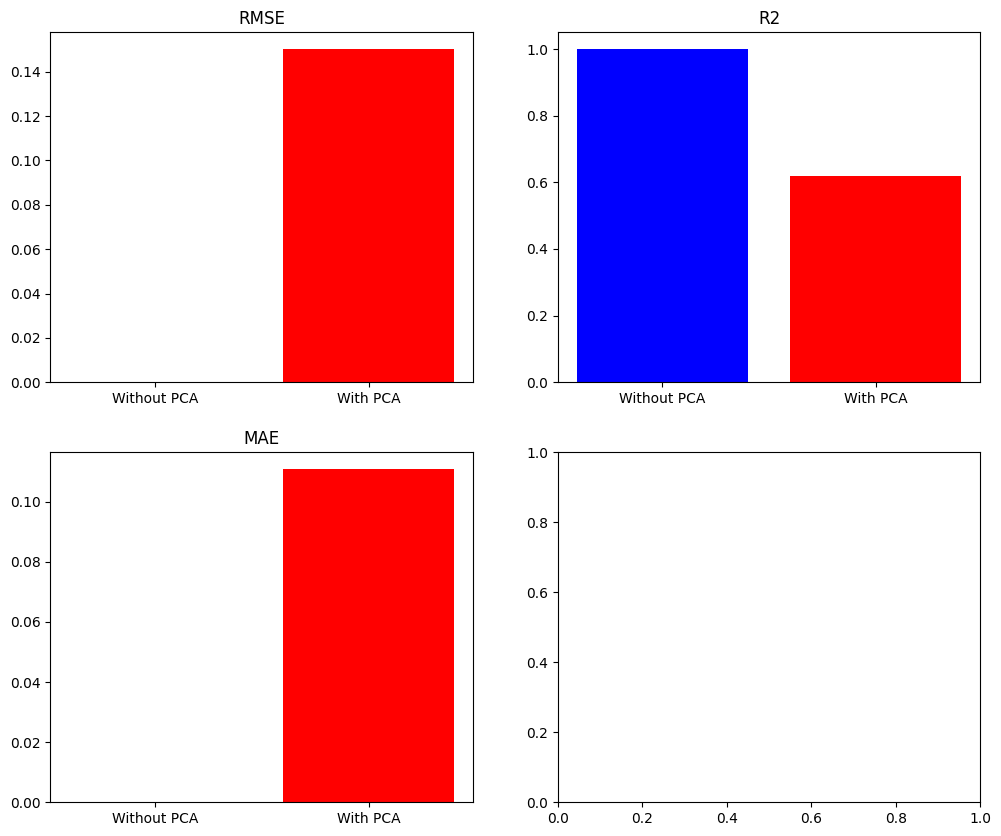

In [116]:
import matplotlib.pyplot as plt
# Create a figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot the RMSE
axes[0,0].bar(['Without PCA', 'With PCA'], [rmse,rmse_pca], color=['b', 'r'], align='center')
axes[0,0].set_title("RMSE")
axes[0,0].set_xticks(['Without PCA', 'With PCA'])

# Plot the R2
axes[0,1].bar(['Without PCA', 'With PCA'], [r2,r2_pca], color=['b', 'r'], align='center')
axes[0,1].set_title("R2")
axes[0,1].set_xticks(['Without PCA', 'With PCA'])

# Plot the MAE
axes[1,0].bar(['Without PCA', 'With PCA'], [mae,mae_pca], color=['b', 'r'], align='center')
axes[1,0].set_title("MAE")
axes[1,0].set_xticks(['Without PCA', 'With PCA'])


# Show the plot
plt.show()

I would choose to use the linear regression model with PCA for this dataset. This is because the RMSE, R2, and MAE are all lower for the linear regression with PCA model, which means that this model is a better fit for the data.